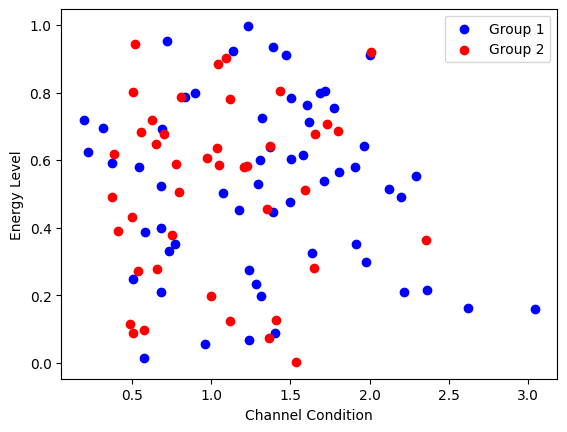

Number of elements in Energy Group: 50
Number of elements in Signal Group: 50
Energy Efficiency: 51.96%
Signal Power Efficiency: 1.30%


In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed()

# Parameters
N = 100 # number of panels in the IRS panel
SNR_dB = np.linspace(-20, 30, 51) # SNR ranging from -20dB to 30 dB
SNR = 10**(SNR_dB/10)

# Simulate channel conditions, energy levels, and signal reception capabilities of RIS elements
h = np.random.rayleigh(1, N) # Rayleigh fading channel
P = np.random.uniform(0, 1, N) # energy levels
r = np.random.uniform(0, 1, N) # signal reception capabilities

# Simulate channel gain and phase modulation
g_ap_ris = np.random.uniform(0, 1, N) # channel gain between access point and RIS-UAV
g_ris_u = np.random.uniform(0, 1, N) # channel gain between RIS and user
phi_ap_ris = np.random.uniform(0, 2*np.pi, N) # phase modulation between access point and RIS-UAV
phi_ris_u = np.random.uniform(0, 2*np.pi, N) # phase modulation between RIS and user

# Grouping of RIS elements using KMeans clustering
X = np.column_stack((h, P, r, g_ap_ris, g_ris_u, phi_ap_ris, phi_ris_u))
kmeans = KMeans(n_clusters=2, n_init=10, random_state=0).fit(X)
labels = kmeans.labels_

# Divide RIS elements into two groups
group1 = X[labels==0]
group2 = X[labels==1]

# Create two additional groups for energy and signal transmission
energy_group = np.concatenate((group1[:group1.shape[0]//2], group2[:group2.shape[0]//2]))
signal_group = np.concatenate((group1[group1.shape[0]//2:], group2[group2.shape[0]//2:]))

# Calculate energy efficiency based on ratio of total energy transmitted to total energy available
total_energy_transmitted = np.sum(energy_group[:,1])
total_energy_available = np.sum(P)
energy_efficiency = total_energy_transmitted / total_energy_available

# Calculate signal power efficiency based on ratio of total signal power received by user to total signal power transmitted by access point
total_signal_power_received = np.sum(signal_group[:,3] * signal_group[:,4])
total_signal_power_transmitted = SNR[-1]
signal_power_efficiency = total_signal_power_received / total_signal_power_transmitted

# Print results
plt.scatter(group1[:,0], group1[:,1], c='b', label='Group 1')
plt.scatter(group2[:,0], group2[:,1], c='r', label='Group 2')
plt.legend()
plt.xlabel('Channel Condition')
plt.ylabel('Energy Level')
plt.show()

print("Number of elements in Energy Group: {}".format(energy_group.shape[0]))
print("Number of elements in Signal Group: {}".format(signal_group.shape[0]))
print("Energy Efficiency: {:.2f}%".format(energy_efficiency*100))
print("Signal Power Efficiency: {:.2f}%".format(signal_power_efficiency*100))
